<a href="https://colab.research.google.com/github/RennanRnz/RennanRnz/blob/main/MOD9TAR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [ ]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [ ]:
lat = sinasc_raw[['munResLat', 'HORANASC', 'CONSULTAS' ]].copy()
lat.head()

,munResLat,HORANASC,CONSULTAS
0,-11.93554,1620.0,4
1,-11.93554,1830.0,4
2,-11.93554,915.0,4
3,-12.13178,835.0,3
4,-11.93554,750.0,4


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [ ]:
def categorizar_latitude(lat):
    #Categorizando a latitude em duas faixas: acima ou abaixo de -10.5.

    if lat > -10.5:
        return 'Acima de -10.5'
    else:
        return 'Abaixo de -10.5'

# Criando uma nova coluna 'faixa_latitude' categorizando a latitude de cada registro.
lat['faixa_latitude'] = lat['munResLat'].map(categorizar_latitude)

# Agrupando os dados por faixa de latitude e conta a quantidade de registros em cada grupo.
lat.groupby('faixa_latitude').count()

,munResLat,HORANASC,CONSULTAS
faixa_latitude,,,
Abaixo de -10.5,12993,12980,12994
Acima de -10.5,14034,14027,14034


In [ ]:
lat.groupby('faixa_latitude').agg({
    'CONSULTAS':['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'HORANASC': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})

CONSULTAS                                               \
                      sum      mean min max median       std       var   
faixa_latitude                                                           
Abaixo de -10.5     48001  3.694090   1   9    4.0  0.643781  0.414454   
Acima de -10.5      48662  3.467436   1   9    4.0  0.888240  0.788970   

                   HORANASC                                                \
                        sum         mean  min     max  median         std   
faixa_latitude                                                              
Abaixo de -10.5  16405658.0  1263.918182  0.0  2358.0  1224.0  544.635902   
Acima de -10.5   17824905.0  1270.756755  0.0  2359.0  1235.0  601.592022   

                                
                           var  
faixa_latitude                  
Abaixo de -10.5  296628.265591  
Acima de -10.5   361912.961218

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [ ]:
area = sinasc_raw[['munResArea','KOTELCHUCK','PARIDADE']].copy()

In [ ]:
def categorizar_area(area):
    #Categoriza uma área em duas faixas: abaixo ou acima de 3000 metros quadrados.

    if area < 3000:
        return 'Abaixo de 3000m²'
    else:
        return 'Acima de 3000m²'

# Criando uma nova coluna 'faixa_area' categorizando a área de cada registro.
area['faixa_area'] = area['munResArea'].map(categorizar_area)

# Agrupando os dados por faixa de área e conta a quantidade de registros em cada grupo.
area.groupby('faixa_area').count()


,munResArea,KOTELCHUCK,PARIDADE
faixa_area,,,
Abaixo de 3000m²,5219,5219,5219
Acima de 3000m²,21808,21809,21809


In [ ]:
area.groupby('faixa_area').agg({
    'KOTELCHUCK':['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'PARIDADE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})

KOTELCHUCK                                               \
                        sum      mean min max median       std       var   
faixa_area                                                                 
Abaixo de 3000m²      24494  4.693236   1   9    5.0  1.456135  2.120328   
Acima de 3000m²      109969  5.042368   1   9    5.0  2.182780  4.764529   

                 PARIDADE                                               
                      sum      mean min max median       std       var  
faixa_area                                                              
Abaixo de 3000m²     3362  0.644185   0   1    1.0  0.478805  0.229255  
Acima de 3000m²     14173  0.649869   0   1    1.0  0.477022  0.227550

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [ ]:
altitude = sinasc_raw[['munResAlt','STTRABPART','SEMAGESTAC']].copy()

In [ ]:
altitude.groupby('munResAlt').agg({
    'STTRABPART':['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'SEMAGESTAC': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})

STTRABPART                                                 \
                 sum      mean  min  max median       std       var   
munResAlt                                                             
85.0           619.0  1.977636  1.0  9.0    2.0  0.748596  0.560396   
87.0         15183.0  1.966965  1.0  9.0    2.0  0.773239  0.597898   
99.0           205.0  1.971154  1.0  9.0    2.0  0.756291  0.571975   
111.0          403.0  2.004975  1.0  9.0    2.0  0.524381  0.274975   
124.0           96.0  1.959184  1.0  2.0    2.0  0.199915  0.039966   
128.0          446.0  2.009009  1.0  9.0    2.0  0.494229  0.244262   
133.0         1530.0  1.981865  1.0  9.0    2.0  0.300769  0.090462   
139.0         3383.0  1.981839  1.0  9.0    2.0  0.288949  0.083492   
144.0         1021.0  2.092213  1.0  9.0    2.0  0.966429  0.933984   
145.0          443.0  1.926087  1.0  2.0    2.0  0.262200  0.068749   
151.0          837.0  1.978723  1.0  2.0    2.0  0.144476  0.020873   
153.0         1133.0  1.950086  1.0  9.0    2.0  0.379547  0.144056   
154.0          155.0  1.962025  1.0  2.0    2.0  0.192356  0.037001   
155.0          380.0  1.979167  1.0  2.0    2.0  0.143200  0.020506   
157.0         4357.0  2.006909  1.0  9.0    2.0  0.798875  0.638201   
158.0          188.0  2.043478  1.0  9.0    2.0  0.754664  0.569517   
161.0          142.0  1.972222  1.0  2.0    2.0  0.165489  0.027387   
163.0         1743.0  2.010381  1.0  9.0    2.0  0.498157  0.248160   
166.0          604.0  2.026846  1.0  9.0    2.0  0.852379  0.726550   
170.0           74.0  1.850000  1.0  2.0    2.0  0.361620  0.130769   
177.0         2603.0  1.908358  1.0  2.0    2.0  0.288626  0.083305   
178.0          602.0  1.993377  1.0  9.0    2.0  0.615381  0.378694   
182.0          427.0  2.103448  1.0  9.0    2.0  0.997094  0.994196   
186.0         1547.0  1.985879  1.0  9.0    2.0  0.293119  0.085919   
191.0          823.0  1.992736  1.0  9.0    2.0  0.378353  0.143151   
192.0          192.0  1.979381  1.0  2.0    2.0  0.142842  0.020404   
197.0          324.0  1.951807  1.0  2.0    2.0  0.214821  0.046148   
202.0          221.0  2.027523  1.0  9.0    2.0  0.699983  0.489976   
206.0          321.0  1.957317  1.0  2.0    2.0  0.202760  0.041112   
212.0          336.0  2.061350  1.0  9.0    2.0  0.791102  0.625843   
215.0           64.0  2.000000  2.0  2.0    2.0  0.000000  0.000000   
227.0         1799.0  1.979098  1.0  9.0    2.0  0.286639  0.082162   
230.0          192.0  1.959184  1.0  2.0    2.0  0.198882  0.039554   
236.0          152.0  1.924051  1.0  2.0    2.0  0.266610  0.071081   
241.0          201.0  1.970588  1.0  9.0    2.0  0.763731  0.583285   
245.0           86.0  2.000000  2.0  2.0    2.0  0.000000  0.000000   
252.0         1296.0  2.066986  1.0  9.0    2.0  0.907183  0.822982   
259.0          511.0  1.965385  1.0  2.0    2.0  0.183156  0.033546   
263.0         1373.0  2.010249  1.0  9.0    2.0  0.563983  0.318077   
265.0          191.0  1.929293  1.0  2.0    2.0  0.257639  0.066378   
266.0          161.0  1.963415  1.0  9.0    2.0  0.852666  0.727040   
269.0          250.0  1.984127  1.0  9.0    2.0  0.680989  0.463746   
270.0          107.0  1.981481  1.0  2.0    2.0  0.136083  0.018519   
296.0           85.0  1.976744  1.0  2.0    2.0  0.152499  0.023256   
338.0          726.0  2.011080  1.0  9.0    2.0  0.547610  0.299877   
340.0          313.0  2.032468  1.0  9.0    2.0  0.835635  0.698285   
397.0          298.0  1.986667  1.0  2.0    2.0  0.115082  0.013244   
419.0          431.0  2.023474  1.0  9.0    2.0  0.710045  0.504163   
595.0         3200.0  2.018927  1.0  9.0    2.0  0.807725  0.652419   

          SEMAGESTAC                                                     
                 sum       mean   min   max median       std        var  
munResAlt                                                                
85.0         12277.0  38.851266  25.0  44.0   39.0  1.928903   3.720665  
87.0        298947.0 

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [ ]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

C:\Users\Luiz\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


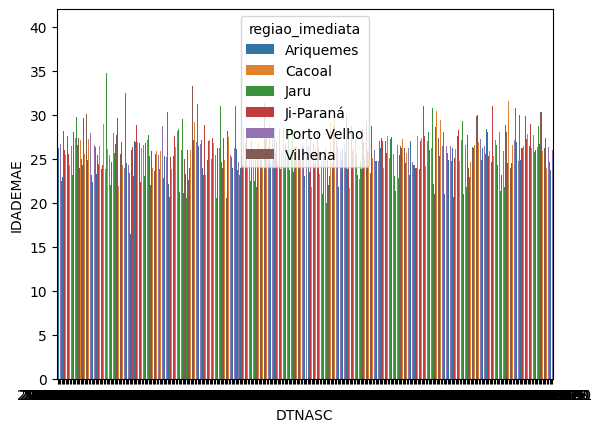

In [ ]:
# Criando uma nova coluna 'regiao_imediata'.
sinasc_raw['regiao_imediata'] = sinasc_raw['munResNome'].map(imediatas)
# Agrupar os dados por ano e região, calculando a média da idade
idade_media_ano_regiao = idade_media.groupby(['DTNASC', 'regiao_imediata'])['IDADEMAE'].mean().reset_index()

# Criar o gráfico de barras empilhadas
sns.barplot(x='DTNASC', y='IDADEMAE', hue='regiao_imediata', data=idade_media_ano_regiao)
plt.show()

C:\Users\Luiz\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


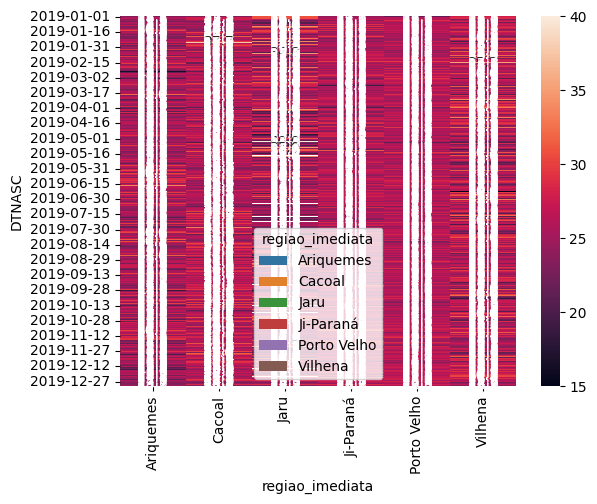

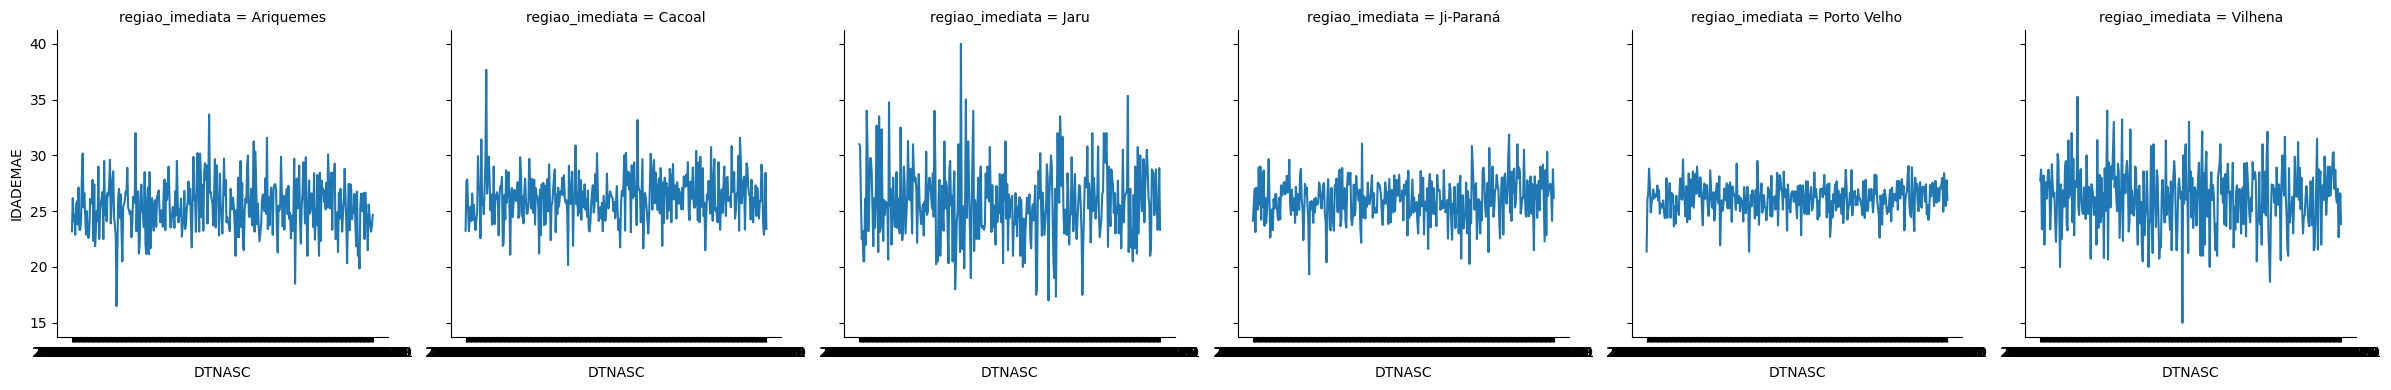

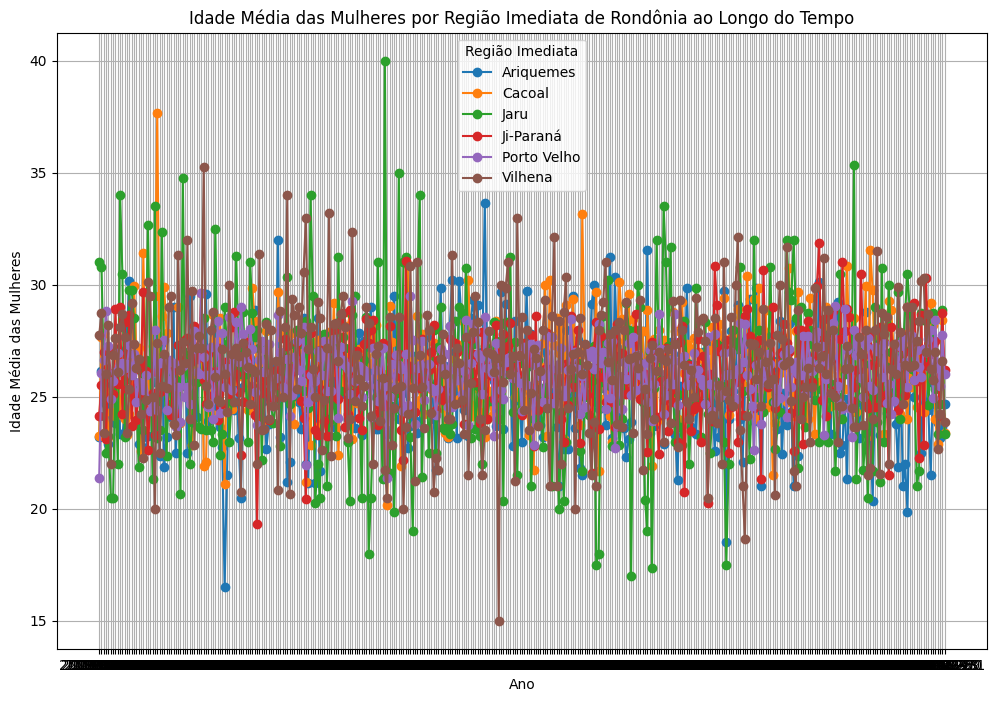

In [ ]:
# Criando uma nova coluna 'regiao_imediata'.
sinasc_raw['regiao_imediata'] = sinasc_raw['munResNome'].map(imediatas)

# Calculando a idade média das mães por data de nascimento e região imediata.
idade_media = sinasc_raw.groupby(['DTNASC', 'regiao_imediata'])['IDADEMAE'].mean().reset_index()

# Cria um gráfico de linhas para visualizar a evolução da idade média das mães por região imediata ao longo do tempo
plt.figure(figsize=(12, 8))  # Define o tamanho da figura
for regiao in idade_media['regiao_imediata'].unique():
    # Filtra os dados para uma determinada região imediata
    dados_regiao = idade_media[idade_media['regiao_imediata'] == regiao]
    # Plota uma linha para a região atual, com marcadores nos pontos de dados
    plt.plot(dados_regiao['DTNASC'], dados_regiao['IDADEMAE'], marker='o', label=regiao)

# Adiciona rótulos aos eixos e um título ao gráfico
plt.xlabel('Ano')
plt.ylabel('Idade Média das Mulheres')
plt.title('Idade Média das Mulheres por Região Imediata de Rondônia ao Longo do Tempo')

plt.legend(title='Região Imediata')
plt.grid(True)
plt.show()


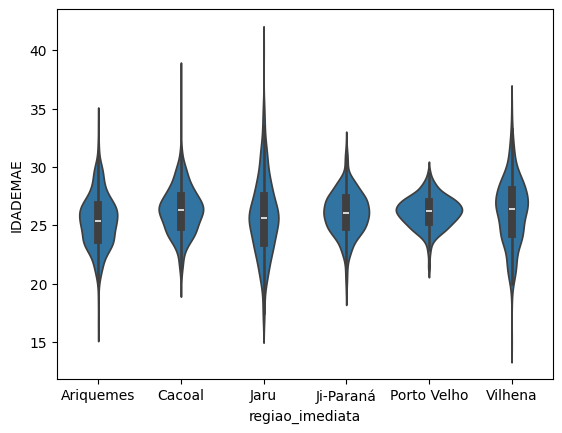

In [ ]:
sns.violinplot(x='regiao_imediata', y='IDADEMAE', data=idade_media)
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


In [ ]:
df = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1')
regioes_map = dict(zip(df['municipio'], df['regiao']))

### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [ ]:
IDH = df[['municipio', 'idh']].copy()

def classificador_IDH (idh):
    if idh >= 0.700:
        return 'Alto'
    elif idh < 700 and idh >= 600:
        return 'Medio'
    else:
        return 'Baixo'

IDH['categoria'] = IDH['idh'].map(classificador_IDH)

IDH.groupby('idh').count()

,municipio,categoria
idh,,
0.584,1,1
0.587,2,2
0.589,1,1
0.592,1,1
0.593,1,1
0.596,2,2
0.598,1,1
0.607,1,1
0.609,1,1


In [ ]:
IDH

,municipio,idh,categoria
0,Alta Floresta D'Oeste,0.641,Baixo
1,Alto Alegre dos Parecis,0.592,Baixo
2,Alto Paraíso,0.625,Baixo
3,Alvorada D'Oeste,0.643,Baixo
4,Ariquemes,0.702,Alto
5,Buritis,0.616,Baixo
6,Cabixi,0.650,Baixo
7,Cacaulândia,0.646,Baixo
8,Cacoal,0.718,Alto
9,Campo Novo de Rondônia,0.593,Baixo


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [ ]:
IFDM = df[['municipio', 'ifdm']].copy()

def classificador_IFDM (ifdm):
    if ifdm >= 0.800:
        return 'Alto'
    elif 0.800 > ifdm >= 0.600:
        return 'Moderado'
    elif 0.600 > ifdm >= 0.400:
        return 'Regular'
    else:
        return 'Baixo'

IFDM['categoria'] = IFDM['ifdm'].map(classificador_IFDM)

IFDM.groupby('ifdm').count()

,municipio,categoria
ifdm,,
0.4562,1,1
0.5046,1,1
0.5055,1,1
0.5084,1,1
0.5272,1,1
0.5322,1,1
0.5405,1,1
0.5430,1,1
0.5502,1,1


In [ ]:
IFDM

,municipio,ifdm,categoria
0,Alta Floresta D'Oeste,0.6337,Moderado
1,Alto Alegre dos Parecis,0.5046,Regular
2,Alto Paraíso,0.5735,Regular
3,Alvorada D'Oeste,0.5919,Regular
4,Ariquemes,0.7746,Moderado
5,Buritis,0.6199,Moderado
6,Cabixi,0.5887,Regular
7,Cacaulândia,0.5721,Regular
8,Cacoal,0.7111,Moderado
9,Campo Novo de Rondônia,0.5272,Regular


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [ ]:
PIB = df[['municipio', 'pib']].copy()

def classificador_PIB (pib):
    if pib >= 1000000000:
        return 'Acima de 1 bilhão'
    elif 1000000000 > pib >= 500000000:
        return 'Acima de 500 milhões'
    elif 500000000 > pib >= 300000000:
        return 'Acima de 300 milhões'
    elif 300000000 > pib >= 200000000:
        return 'Acima de 200 milhões'
    elif 200000000 > pib >= 100000000:
        return 'Acima de 100 milhões'
    else:
        return 'Até 100 milhões'

PIB['categoria'] = PIB['pib'].map(classificador_PIB)

PIB.groupby('pib').count()

,municipio,categoria
pib,,
52908,1,1
59779,1,1
72084,1,1
72089,1,1
76756,1,1
76854,1,1
80759,1,1
92346,1,1
105208,1,1


In [ ]:
PIB

,municipio,pib,categoria
0,Alta Floresta D'Oeste,496000,Até 100 milhões
1,Alto Alegre dos Parecis,213410,Até 100 milhões
2,Alto Paraíso,358000,Até 100 milhões
3,Alvorada D'Oeste,204098,Até 100 milhões
4,Ariquemes,2579830,Até 100 milhões
5,Buritis,726000,Até 100 milhões
6,Cabixi,113031,Até 100 milhões
7,Cacaulândia,116635,Até 100 milhões
8,Cacoal,2261644,Até 100 milhões
9,Campo Novo de Rondônia,208821,Até 100 milhões


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Munícipios com o maior PIB tendem a ter uma maior a taxa de natalidade, possivelmente isto esteja atrelado a densidade demográfica desses locais serem maiores também, outros fatores também influenciam pois cidades com maiores PIB tendem a ter uma infraestrutura melhor o que permite um maior segurança para uma gestação.

-------------------------------------------------------
